In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
colors = ['orange', 'blue','green', "purple", 'red', "cyan", "gray", "olive", "brown", "pink"]
w, h = 6, 14
print(plt.style.available)
plt.style.use('seaborn-white')
n_trainable_params = 312598

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
def plot(paths, title, N_train = 1000, N_test = 100, label_prefix = '', label_suffix = '', prefix = './results/', legend_title = "", legend_font_size = 20):
    fig, ax = plt.subplots(2, 1, figsize = (w, h))
    N = 800;
    #train accuracy
    for i, k in enumerate(paths.keys()):
        train_acc = list(pd.read_csv(os.path.join(prefix, paths[k], 'acc', 'training_acc.csv')).to_numpy()[:,1])
        ax[0].plot(train_acc[0::50], colors[i%len(colors)], label=f'{label_prefix}{k}{label_suffix}', linewidth=3.0)

    ax[0].set_xlabel("Epoch Number", fontsize=20, fontweight='bold')
    ax[0].set_ylabel("Train Accuracy (%)", fontsize=20, fontweight='bold')
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20)
    #ax[0].set_yscale("log")
    #ax[0].set_title("(a)", fontweight = 'bold', fontsize = 20)
    ax[0].legend(loc='best', fontsize = legend_font_size, title = legend_title, title_fontsize = 20)
    #ax[0].grid(which='both')
    #ax[0].set_ylim([90,110])
    
    #test accuracy
    N = 400;
    for i, k in enumerate(paths.keys()):
        test_acc = list(pd.read_csv(os.path.join(prefix, paths[k], 'acc', 'test_acc.csv')).to_numpy()[:,1])
        ax[1].plot(test_acc, colors[i%len(colors)], label=f'{label_prefix}{k}{label_suffix}', linewidth=3.0)

    ax[1].set_xlabel("Epoch Number", fontsize=20, fontweight='bold')
    ax[1].set_ylabel("Test Accuracy (%)", fontsize=20, fontweight='bold')
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20)
    #ax[1].set_yscale("log")
    #ax[1].set_title("(b)", fontweight = 'bold', fontsize = 20)
    ax[1].legend(loc='best', fontsize=legend_font_size,  title = legend_title, title_fontsize = 20)
    #ax[1].grid(which = 'both')
    #ax[1].set_ylim([70,100])

    #fig.suptitle(title, fontsize=20, fontweight='bold');
    return fig, ax

## Varying Bit Precision


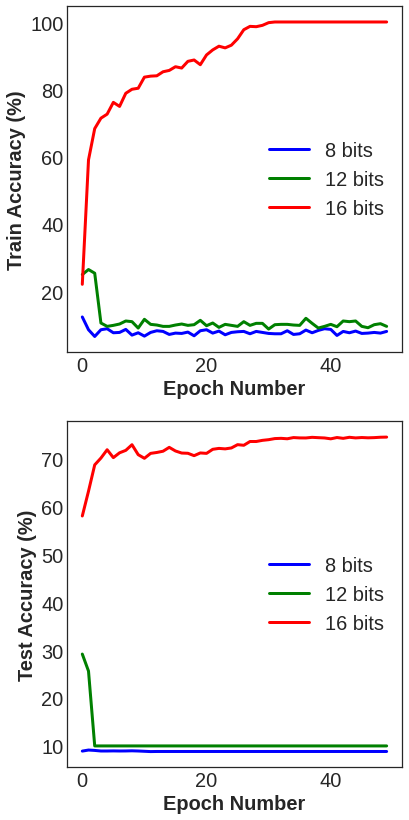

In [14]:
prefix = './results/'
paths = {
    8: 'res_10_8_4_False_0.06_False_0.04',
    #10: 'res_10_10_6_False_0.06_False_0.04',
    12: 'res_10_12_6_False_0.06_False_0.04',
    16:'res_10_15_6_False_0.06_False_0.04'
}
colors = ['blue', 'green', 'red']
fig, ax = plot(paths, "Varying Bit Precision", label_suffix = ' bits')
fig.savefig('varying_bit_precision.png', dpi = 300, pad_inches = 0.2, bbox_inches = 'tight')

## Device Variations

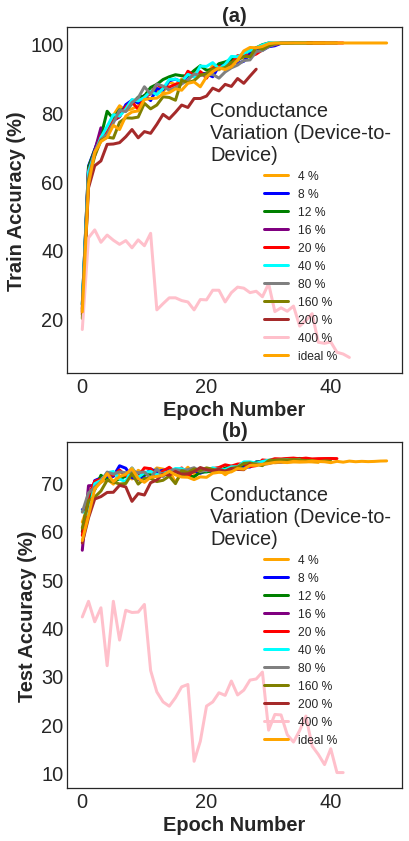

In [12]:
prefix = './results/'
params = [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.8, 1.0, 2.0]
paths = {
    int(200*x): 'res_10_15_6_True_0.06_True_{}'.format(x) for x in params
}
paths['ideal'] = 'res_10_15_6_False_0.06_False_0.04'
fig, ax = plot(paths, "Adding Device Variations", label_suffix = " %", legend_title = "Conductance\nVariation (Device-to-\nDevice)",
              legend_font_size = 12)
fig.savefig('device_variations.png', dpi = 300, pad_inches = 0.2, bbox_inches = 'tight')

## Write Noise

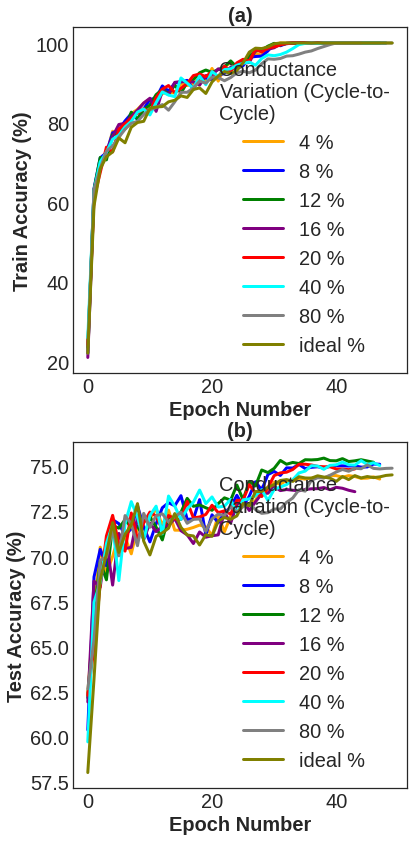

In [13]:
prefix = './results/'
params = [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4]
paths = {
    int(200*x): 'res_10_15_6_True_{}_False_0.04'.format(x) for x in params
}
paths['ideal'] = 'res_10_15_6_False_0.06_False_0.04'
colors = ['orange', 'blue','green', "purple", 'red', "cyan", "gray", "olive", "brown", "pink"]
fig, ax = plot(paths, "Adding Write Noise", label_suffix = " %", legend_title = "Conductance\nVariation (Cycle-to-\nCycle)")
fig.savefig('write_noise.png', dpi = 300, pad_inches = 0.2, bbox_inches = 'tight')

## Refresh Frequency

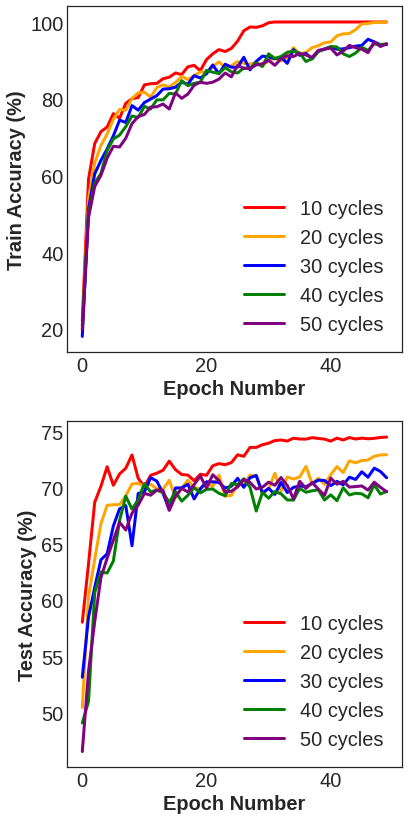

In [15]:
prefix = './results/'
params = [10, 20, 30, 40, 50]
paths = {
    x: 'res_{}_15_6_False_0.06_False_0.04'.format(x) for x in params
}
colors = ['red', 'orange', 'blue','green', "purple", "cyan", "gray", "olive", "brown", "pink"]
fig, ax = plot(paths, "Varying Refresh Frequency", label_suffix= " cycles")
fig.savefig('ref_freq.png', dpi = 300, pad_inches = 0.2, bbox_inches = 'tight')

## MNIST, Fashion MNIST, CIFAR 10

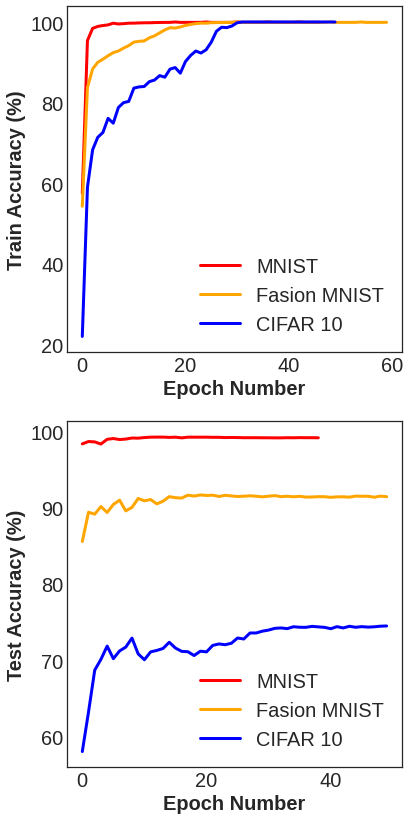

In [16]:
paths = {
    'MNIST': 'mnist/res_10_15_6_False_0.06_False_0.04',
    'Fasion MNIST': 'fashion_mnist/res_10_15_6_False_0.06_False_0.04',
    'CIFAR 10': 'res_10_15_6_False_0.06_False_0.04'
}

fig, ax = plot(paths, "Different Datasets")

## Tracking weight changes in the network accross time

MNIST 
 2.1652208841120404e-09
Fashion MNIST 
 1.8709509020219132e-08
CIFAR10 
 7.536228403854852e-08


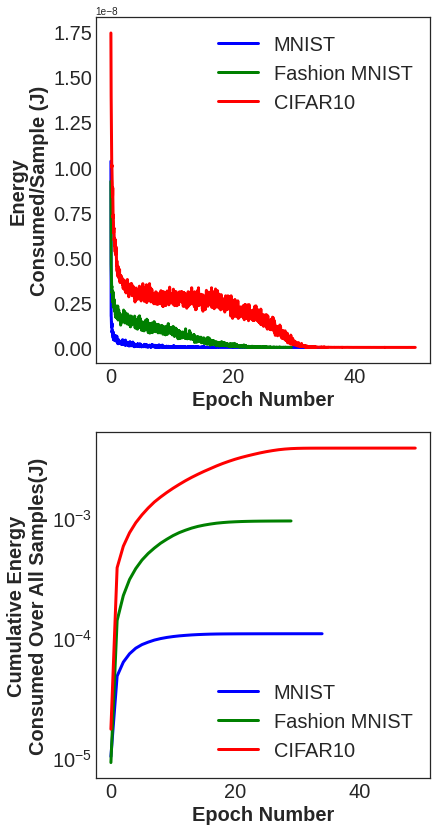

In [9]:
paths = {
    'MNIST':'wc_mnist_2/res_10_15_6_False_0.06_False_0.04',
    'Fashion MNIST':'wc_fashion_mnist/res_10_15_6_False_0.06_False_0.04',
    'CIFAR10': 'wc_cifar/res_10_15_6_False_0.06_False_0.04'
}
prefix = './results/'
quanta = 2**(-15)
fig, ax = plt.subplots(2, 1, figsize = (w, h))

I = 100e-6 
R = 50
dt = 3e-9

colors = ['blue', 'green', 'red']
for i,k in enumerate(paths):
    wc_hist = pd.read_csv(os.path.join(prefix, paths[k], 'acc', 'weight_change.csv')).to_numpy()[:,1]
    quanta_change = wc_hist/(quanta**2)
    E = quanta_change*(I**2)*R*dt
    print(k, "\n", np.sum(E)/5e4)
    ax[0].plot(np.arange(E.shape[0])/50, E/(1000), label = k, color=colors[i%len(colors)], linewidth=3.0)
    ax[1].plot(list(np.cumsum(E))[::50], label = k, color=colors[i%len(colors)], linewidth=3.0)
    
ax[0].set_ylabel("Energy\nConsumed/Sample (J)", fontsize=20, fontweight='bold')
ax[0].set_xlabel("Epoch Number", fontsize=20, fontweight='bold')
ax[0].legend(loc='best', fontsize = 20, title_fontsize = 20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[1].set_ylabel("Cumulative Energy\nConsumed Over All Samples(J)", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Epoch Number", fontsize=20, fontweight='bold')
ax[1].set_yscale("log")
ax[1].legend(loc='best', fontsize = 20, title_fontsize = 20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)


fig.savefig('energy.png', dpi = 300, pad_inches = 0.2, bbox_inches = 'tight')